# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

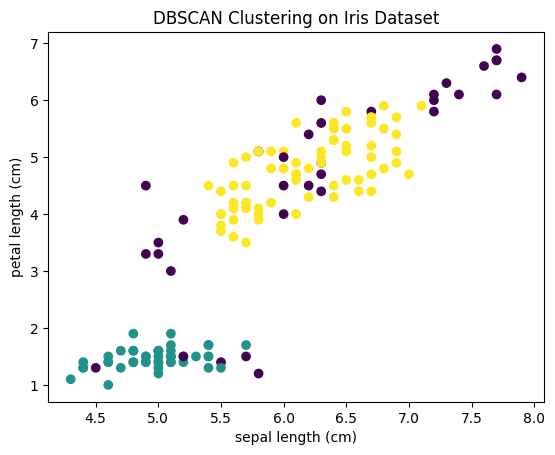

In [4]:
#import libraries
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#load the iris dataset
iris = load_iris()
X = iris.data

#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train the model
dbscan = DBSCAN(eps=0.5, min_samples=5)
model = dbscan.fit(X_scaled)

# Plot the data
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

## Hyperparameters for DBSCAN

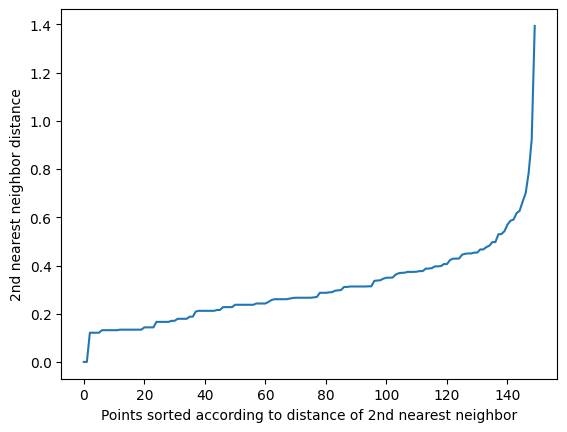

In [6]:
#import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

#load the iris dataset
data = sns.load_dataset('iris')

# Normalize the features
features = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Fit the model
model = NearestNeighbors(n_neighbors=5)
model.fit(features)
distances, indices = model.kneighbors(features)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')
plt.show()

In [ ]:
#install kneed library
!pip install kneed

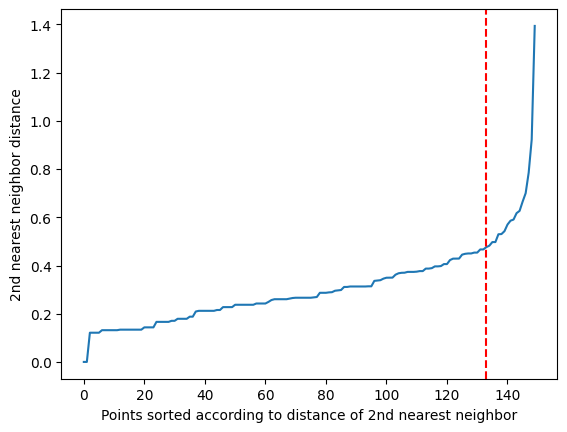

Suggested value of eps: 0.4760712736677158


In [9]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kneed import KneeLocator

# Load the 'iris' dataset
data = sns.load_dataset('iris')

# Normalize the features
features = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Identify the "elbow" in the k-distance plot
kneedle = KneeLocator(range(1,len(distances)+1), distances, S=1.0, curve='convex', direction='increasing')
elbow_index = kneedle.elbow

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')

# Add a vertical line at the "elbow" point
plt.axvline(x=elbow_index, color='r', linestyle='--')

plt.show()

# Print the value of 'eps'
print('Suggested value of eps:', distances[elbow_index])

## Find the best num of MinPts

In [10]:
#import libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Use the previously calculated 'eps' (from the k-distance plot)
eps = 0.5  # Replace with your calculated value

# Define the range for 'minPts'
minPts_range = range(2, 11)

# Initialize the variables to store the best 'minPts' and the corresponding silhouette score
best_minPts = -1
best_silhouette = -float('inf')

# Grid search over the 'minPts' range
for minPts in minPts_range:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(features)
    
    # Ignore execution if no clusters were found
    if len(np.unique(labels)) < 2 or (labels == -1).all():
        continue

    silhouette = silhouette_score(features, labels)
    print(f'minPts: {minPts}, silhouette score: {silhouette}')

    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_minPts = minPts

print(f'Best minPts: {best_minPts}, silhouette score: {best_silhouette}')

minPts: 2, silhouette score: 0.1150059338947623
minPts: 3, silhouette score: 0.15971036873870176
minPts: 4, silhouette score: 0.36457435678297534
minPts: 5, silhouette score: 0.35651648142700726
minPts: 6, silhouette score: 0.1958665929942779
minPts: 7, silhouette score: 0.1391483140504277
minPts: 8, silhouette score: 0.18821743063720223
minPts: 9, silhouette score: 0.06932089894577982
minPts: 10, silhouette score: 0.009426257445526207
Best minPts: 4, silhouette score: 0.36457435678297534
